#Definição do Problema

Este estudo de caso busca investigar e compreender os padrões temporais e espaciais da criminalidade em Toronto entre os anos de 2014 e 2024, utilizando dados abertos fornecidos pelas autoridades locais. A partir dessa análise, pretende-se responder as seguintes questões:

1. Quais são os períodos do ano e os horários mais críticos em termos de criminalidade?

2. Quais bairros ou regiões concentram os maiores índices de ocorrências?

3. Quais tipos de crimes são mais frequentes e como eles se distribuem ao longo do tempo e do espaço?

4. Existem padrões recorrentes ou tendências preocupantes que possam subsidiar a tomada de decisão por parte das autoridades?

#Bibliotecas + Base de dados

In [113]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [114]:
path = kagglehub.dataset_download("mohammadbadi/crimes-in-toronto")
path = path + "/major-crime-indicators.csv"

toronto_crimes = pd.read_csv(path, index_col="_id")

In [115]:
print(f'Dimensões da tabela: {toronto_crimes.shape[0]} linhas e {toronto_crimes.shape[1]} colunas')

Dimensões da tabela: 420200 linhas e 28 colunas


In [116]:
toronto_crimes.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
_id,,,,,,,,,,,,,,,,,,,,,
1,GO-20141263217,2014-01-01,2013-12-31,2014,January,1,1,Wednesday,16,2013.0,...,2135,210,Theft Of Motor Vehicle,Auto Theft,043,Victoria Village (43),043,Victoria Village (43),-79.306754,43.734654
2,GO-20141260715,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3,2014.0,...,1430,100,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.455770,43.677775
3,GO-20141260730,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3,2014.0,...,1430,100,Assault,Assault,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.406223,43.727681
4,GO-20141260597,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,2,2014.0,...,1430,100,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594,43.654946
5,GO-20141259762,2014-01-01,2013-12-31,2014,January,1,1,Wednesday,2,2013.0,...,1430,100,Assault,Assault,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.390786,43.649125


In [117]:
toronto_crimes.describe()

,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84
count,420200.000000,420200.000000,420200.000000,420200.000000,420056.000000,420056.000000,420056.000000,420200.000000,420200.000000,420200.000000,413904.000000,413904.000000
mean,2019.386318,15.753870,186.549907,12.703046,2019.322043,15.442867,185.716216,12.556763,1710.741521,147.253127,-79.398314,43.706711
std,3.190250,8.778498,103.870838,6.458732,3.225379,8.944200,104.271781,7.283649,329.726694,52.287475,0.103381,0.052826
min,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,1410.000000,100.000000,-79.639247,43.586487
25%,2017.000000,8.000000,98.000000,8.000000,2017.000000,8.000000,97.000000,6.000000,1430.000000,100.000000,-79.476579,43.660811
50%,2019.000000,16.000000,189.000000,13.000000,2019.000000,15.000000,187.000000,14.000000,1457.000000,100.000000,-79.396216,43.700697
75%,2022.000000,23.000000,276.000000,18.000000,2022.000000,23.000000,275.000000,19.000000,2120.000000,200.000000,-79.327552,43.751400
max,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,2135.000000,230.000000,-79.122044,43.853164


In [118]:
toronto_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420200 entries, 1 to 420200
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EVENT_UNIQUE_ID    420200 non-null  object 
 1   REPORT_DATE        420200 non-null  object 
 2   OCC_DATE           420200 non-null  object 
 3   REPORT_YEAR        420200 non-null  int64  
 4   REPORT_MONTH       420200 non-null  object 
 5   REPORT_DAY         420200 non-null  int64  
 6   REPORT_DOY         420200 non-null  int64  
 7   REPORT_DOW         420200 non-null  object 
 8   REPORT_HOUR        420200 non-null  int64  
 9   OCC_YEAR           420056 non-null  float64
 10  OCC_MONTH          420056 non-null  object 
 11  OCC_DAY            420056 non-null  float64
 12  OCC_DOY            420056 non-null  float64
 13  OCC_DOW            420056 non-null  object 
 14  OCC_HOUR           420200 non-null  int64  
 15  DIVISION           420200 non-null  object 
 16  LOCATIO

#Análise


Após realizar todos os ajustes, vamos começar a análise exploratória dos dados, com a finalidade de gerar insights que nos levem ao caminho para responder as questões propostas à este estudo de caso. Para isso, devemos primeiro entender as caracteristicas principais dos casos. Ou seja, informações como: o reporte do crime acontece quantos anos depois da ocorrência? Qual bairro apresenta maior frequência de crimes? Entre outras.

In [119]:
group_occ_year = toronto_crimes.groupby(['OCC_YEAR']).size()
group_report_year = toronto_crimes.groupby(['REPORT_YEAR']).size()

Dentro da nossa linha de raciocínio, vamos primeiro entender a ocorrência de crimes por ano/mês/dia e a quantidade total dentro dessas faixas (somado a hora também).

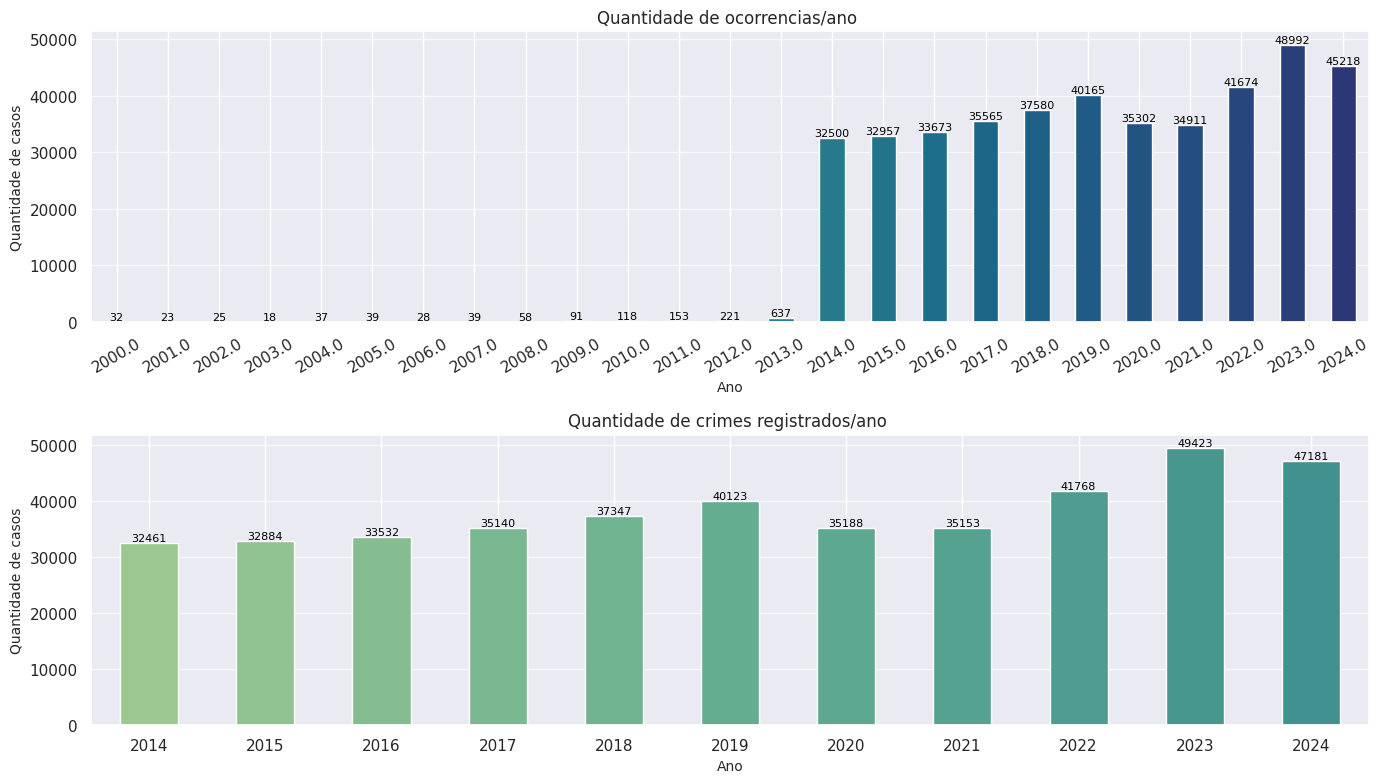

In [120]:
def add_values(ax):
    for c in ax.containers:
        labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, color='black')

palette_color = sns.color_palette("crest",len(group_occ_year))

fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14,8))

group_occ_year.plot(kind='bar', stacked=True, color=palette_color, zorder=2, ax=ax[0])
ax[0].set_title('Quantidade total de ocorrencias/ano ', fontsize=12)
ax[0].set_xlabel('Ano', fontsize=10)
ax[0].set_ylabel('Quantidade de casos', fontsize=10)
ax[0].grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
ax[0].tick_params(axis='x', labelrotation=30)
add_values(ax[0])

group_report_year.plot(kind='bar', stacked=True, color=palette_color, zorder=2, ax=ax[1])
ax[1].set_title('Quantidade total de crimes registrados/ano ', fontsize=12)
ax[1].set_xlabel('Ano', fontsize=10)
ax[1].set_ylabel('Quantidade de casos', fontsize=10)
ax[1].grid(axis='y',linestyle='-', alpha=0.7, zorder=1)
ax[1].tick_params(axis='x', labelrotation=0)
add_values(ax[1])



plt.tight_layout()
plt.show()

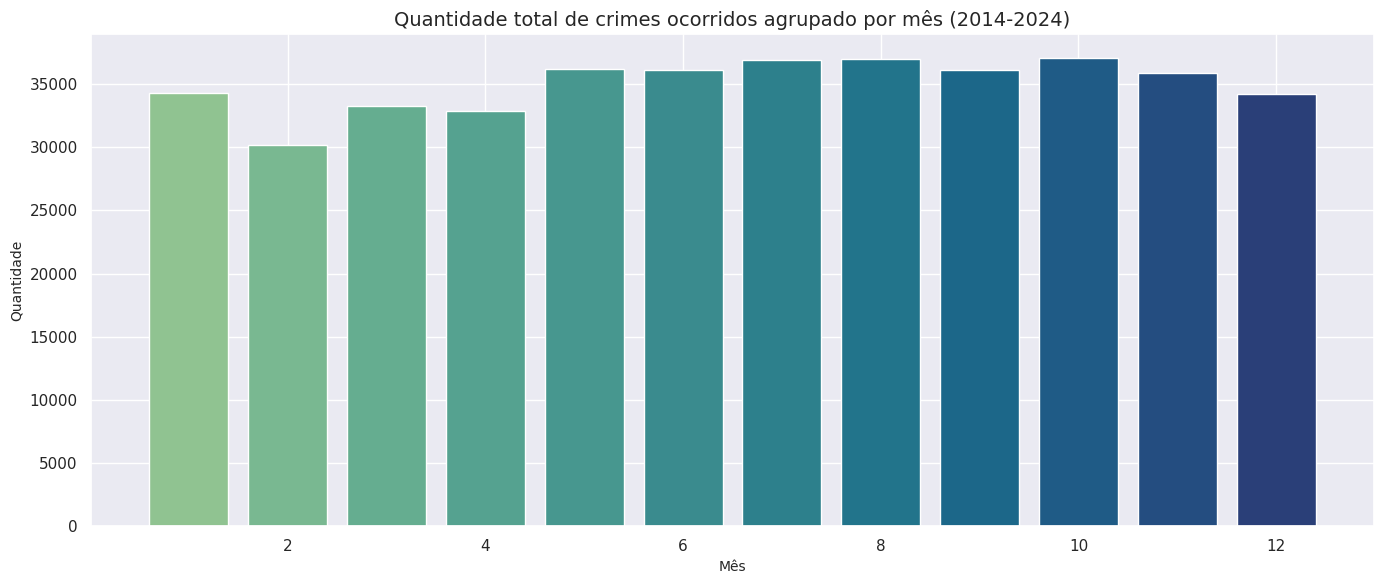

In [160]:
toronto_crimes['MONTH'] = pd.to_datetime(toronto_crimes['OCC_DATE']).dt.month
group_mes_crimes = toronto_crimes.groupby('MONTH').size().reset_index(name='TOTAL')

color_month = sns.color_palette('crest',12)

fig = plt.figure(figsize=(14,6))

plt.bar(group_mes_crimes['MONTH'], group_mes_crimes['TOTAL'], color=color_month)
plt.title('Quantidade total de crimes ocorridos agrupado por mês (2014-2024)', fontsize=14)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)

plt.tight_layout()
plt.show()

In [157]:
toronto_crimes['REPORT_DATE'] = pd.to_datetime(toronto_crimes['REPORT_DATE'], errors='coerce')
toronto_crimes['REPORT_MONTH_2'] = toronto_crimes['REPORT_DATE'].dt.month
toronto_crimes['REPORT_YEAR'] = toronto_crimes['REPORT_DATE'].dt.year
group_sazonal_report = toronto_crimes.groupby(['REPORT_MONTH_2','REPORT_YEAR']).size().reset_index(name='FREQ')

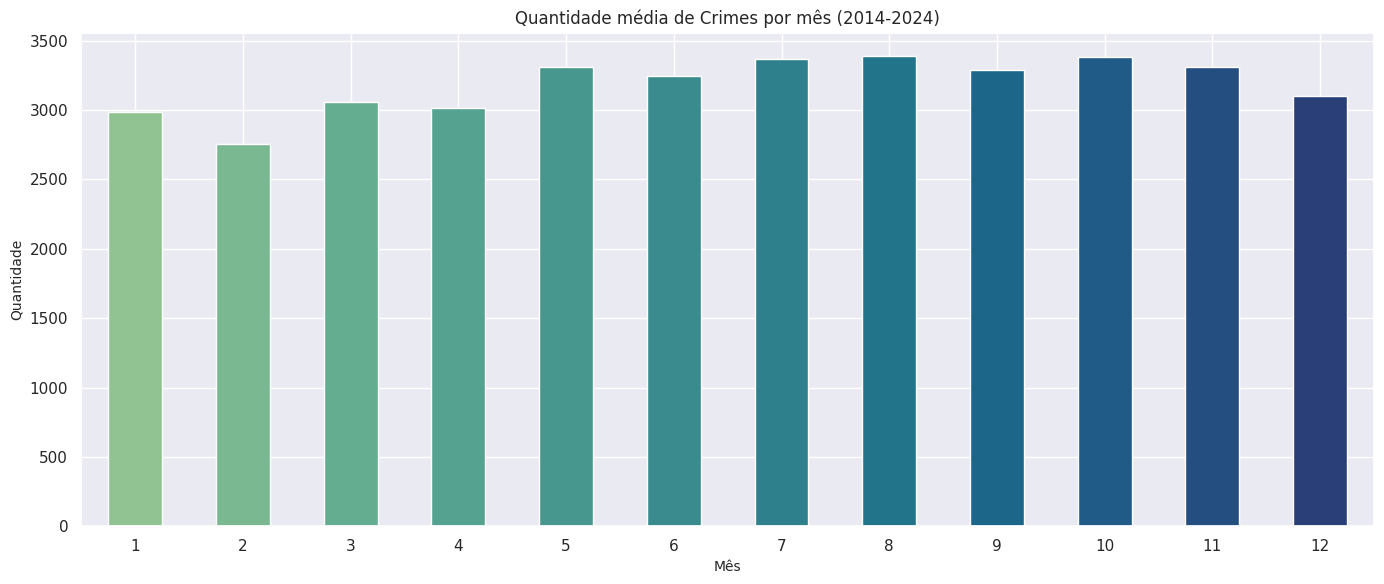

In [159]:
media_crimes_por_mes = group_sazonal_report.groupby('REPORT_MONTH_2')['FREQ'].mean().reset_index(name='MEAN_CRIMES')

palette_color_month = sns.color_palette('crest', 12)

media_crimes_por_mes.plot(kind='bar', x='REPORT_MONTH_2', y='MEAN_CRIMES', stacked=True, color=palette_color_month, zorder=2, figsize=(14,6))
plt.title('Quantidade média de Crimes por mês (2014-2024)', fontsize=12)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)
plt.grid(axis='y', alpha=1, zorder=1)
plt.xticks(rotation=0)
plt.legend().remove()

plt.tight_layout()
plt.show()


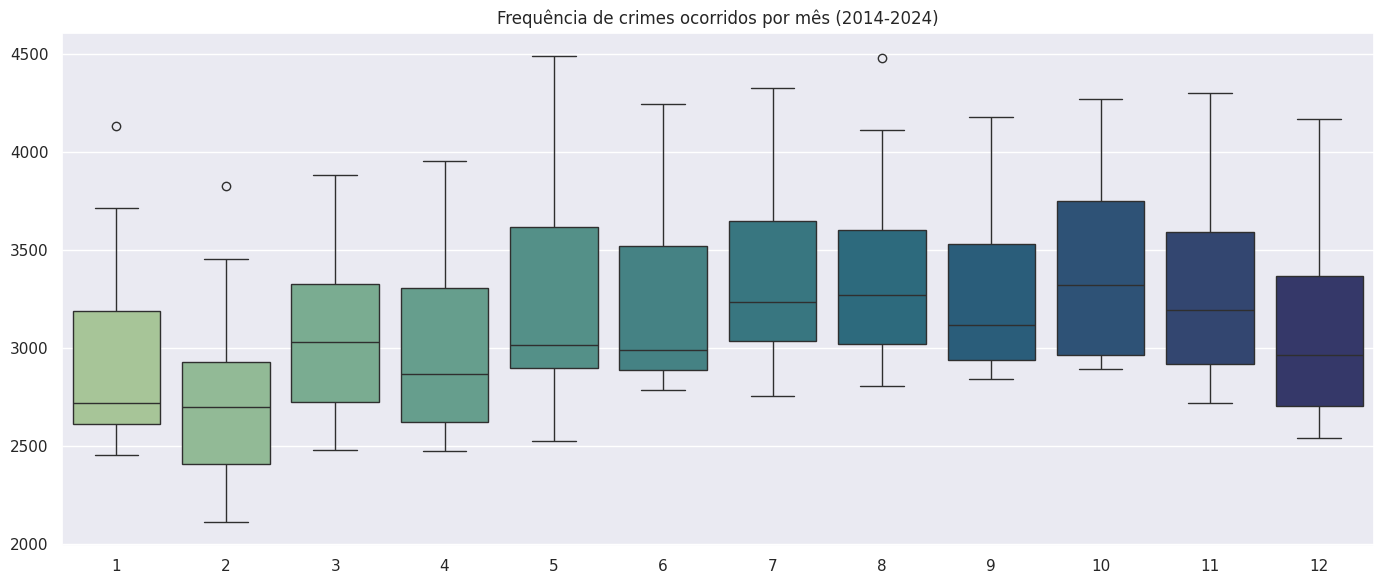

In [165]:
fig = plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')

sns.boxplot(data=group_sazonal_report, x='REPORT_MONTH_2', y='FREQ', hue='REPORT_MONTH_2', palette='crest', legend=False, zorder=1)
plt.title('Frequência de crimes ocorridos por mês (2014-2024)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.grid(axis='y', alpha=1, zorder=2)

plt.tight_layout()
plt.show()

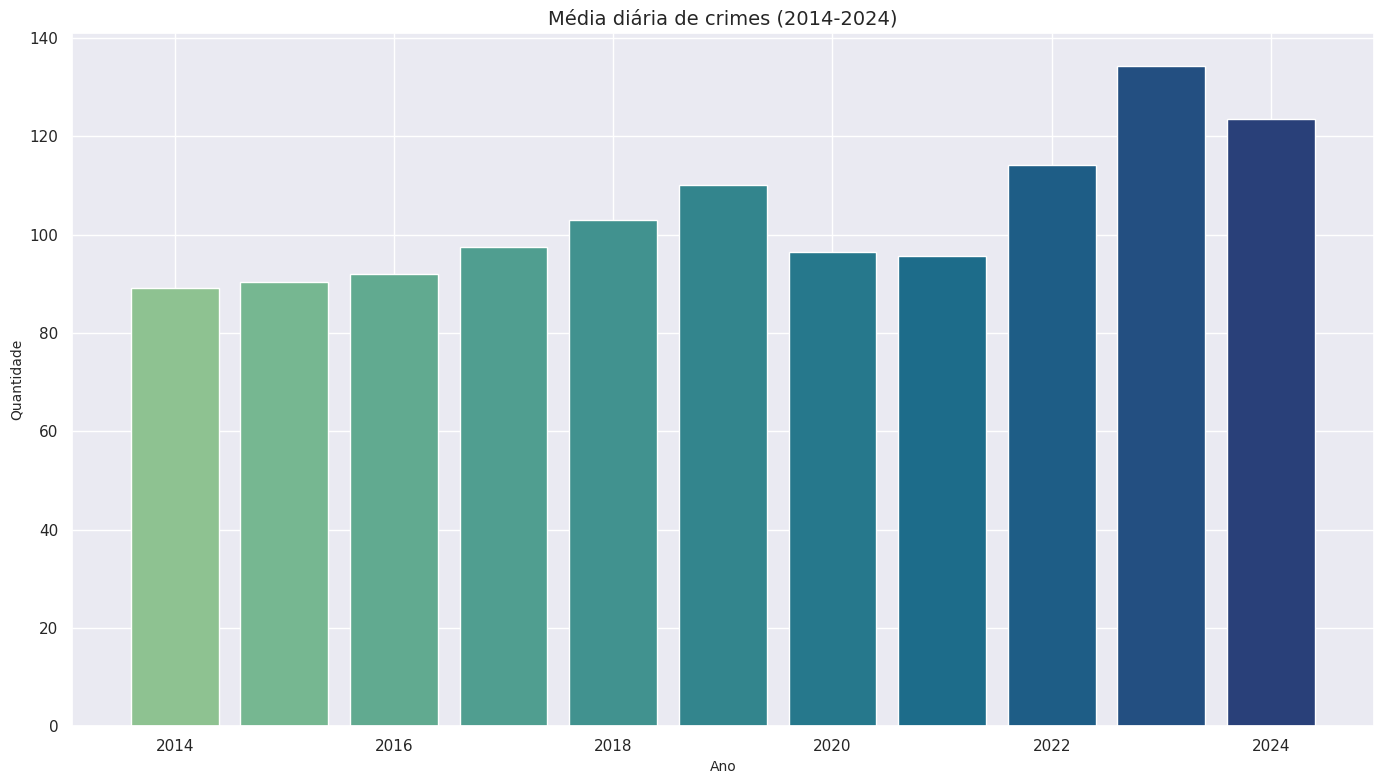

In [125]:
toronto_crimes['DATE'] = pd.to_datetime(toronto_crimes['OCC_DATE'])
toronto_crimes['DAY'] = toronto_crimes['DATE'].dt.date
toronto_crimes['YEAR'] = toronto_crimes['DATE'].dt.year

crimes_por_dia = toronto_crimes.groupby(['YEAR', 'DAY']).size().reset_index(name='TOTAL')
crimes_por_dia = crimes_por_dia.groupby('YEAR')['TOTAL'].mean().reset_index(name='MEDIA_DAY')
crimes_por_dia = crimes_por_dia.loc[crimes_por_dia['YEAR']>=2014]

palette_media_dia = sns.color_palette('crest', 11)

fig = plt.figure(figsize=(14,8))

plt.bar(crimes_por_dia['YEAR'],crimes_por_dia['MEDIA_DAY'], color=palette_media_dia)
plt.title('Média diária de crimes (2014-2024)',fontsize=14)
plt.xlabel('Ano',fontsize=10)
plt.ylabel('Quantidade',fontsize=10)

plt.tight_layout()
plt.show()

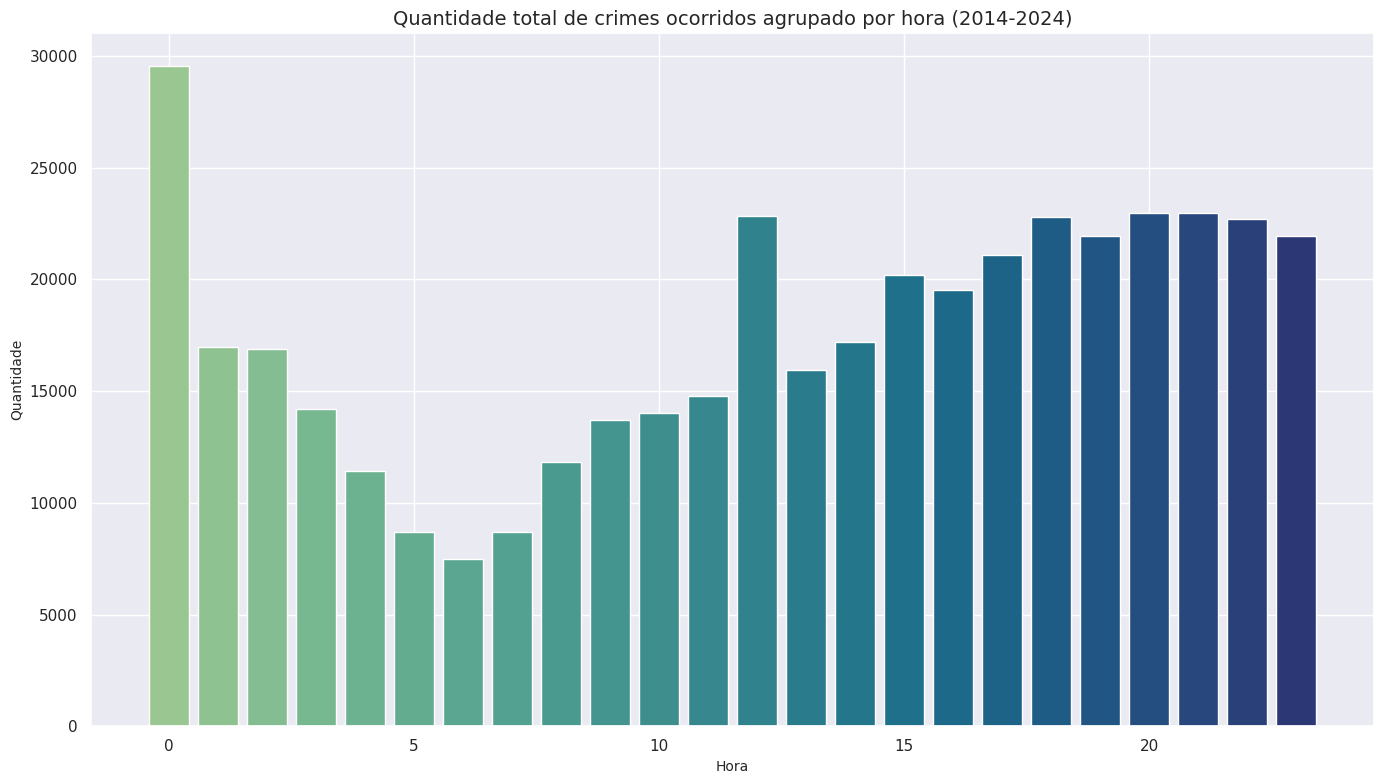

In [148]:
crimes_por_hora = toronto_crimes.groupby('OCC_HOUR').size().reset_index(name='Q_CRIME')

palette_color_hour = sns.color_palette('crest', 24)

fig, ax = plt.subplots(figsize=(14,8))

ax.bar(crimes_por_hora['OCC_HOUR'], crimes_por_hora['Q_CRIME'], color=palette_color_hour)
ax.set_xlabel('Hora', fontsize=10)
ax.set_ylabel('Quantidade', fontsize=10)
ax.set_title('Quantidade total de crimes ocorridos agrupado por hora (2014-2024)', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

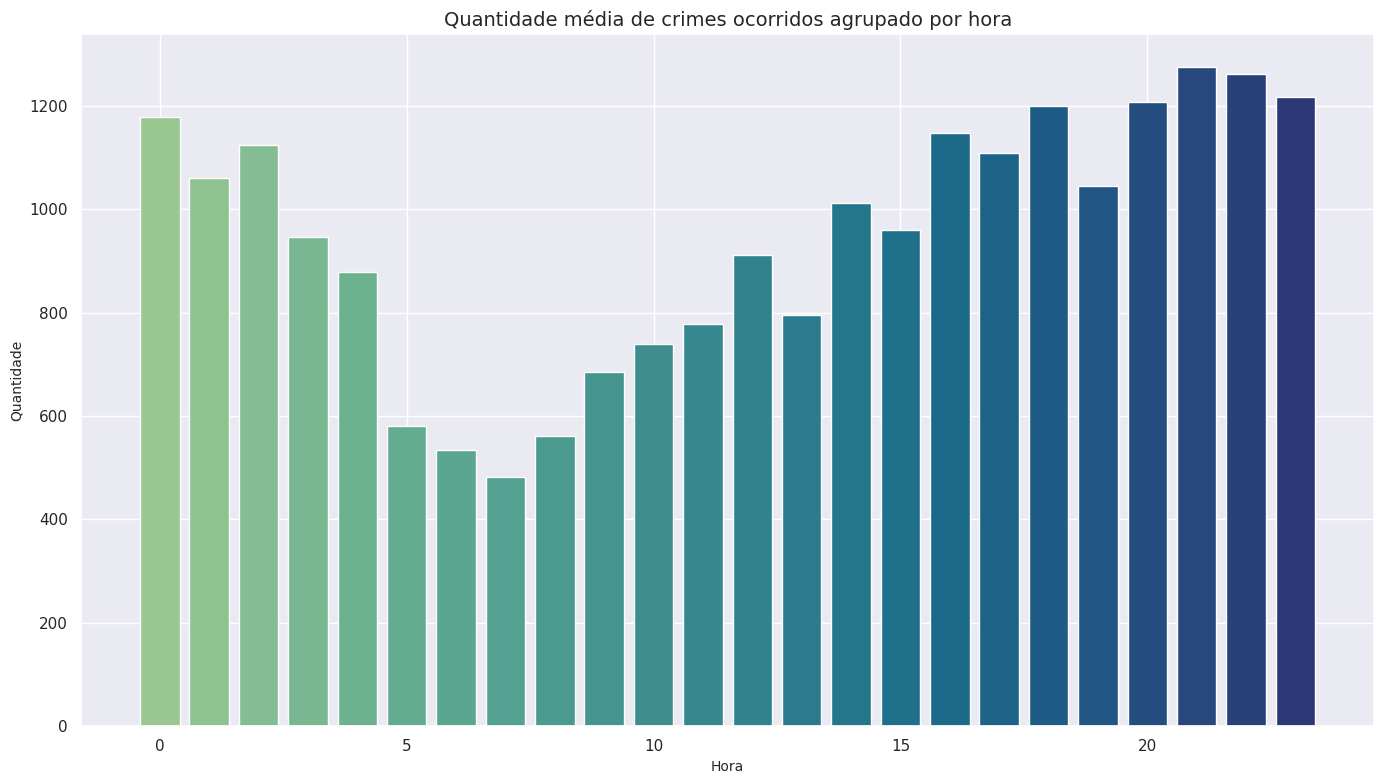

In [166]:
crimes_por_hora = toronto_crimes.groupby(['OCC_HOUR','OCC_YEAR']).size().reset_index(name='Q_CRIME')
crimes_por_hora = crimes_por_hora.groupby('OCC_HOUR')['Q_CRIME'].mean().reset_index(name='MEAN_CRIME')

palette_color_hour = sns.color_palette('crest', 24)

fig, ax = plt.subplots(figsize=(14,8))

ax.bar(crimes_por_hora['OCC_HOUR'], crimes_por_hora['MEAN_CRIME'], color=palette_color_hour)
ax.set_xlabel('Hora', fontsize=10)
ax.set_ylabel('Quantidade', fontsize=10)
ax.set_title('Quantidade média de crimes ocorridos agrupado por hora (2014-2024)', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Com o cálculo de quantidade total versus a média, podemos começar a responder as primeiras perguntas deste estudo. Entendemos que apesar da quantidade total de ocorrência de crimes indicar meia noite como o horário mais perigoso, ao olhar para a média isso não se confirma. Apesar de continuar sendo um horário perigoso, a média aponta para horários anteriores como mais perigosos.

Além disso, também confirmamos que há uma tendência de crescimento na média de crimes ocorrida diariamente a cada ano. O mesmo se aplicava quando falamos sobre a tendencia de ano, porém, com a chegada da pandemia de COVID-19 há uma uma queda no indice de crimes para os anos de 2020 e 2021, mas que a partir de 2022 recupera seu crescimento.

A partir deste ponto, devemos entender a ocorrência/reporte de crimes, além de investigar onde esses crimes acontecem. Vamos começar com uma abordagem macro - ou seja, sem agrupamento de tipo de ocorrência-, e seguir para a visão micro - com agrupamento dos principais crimes.   

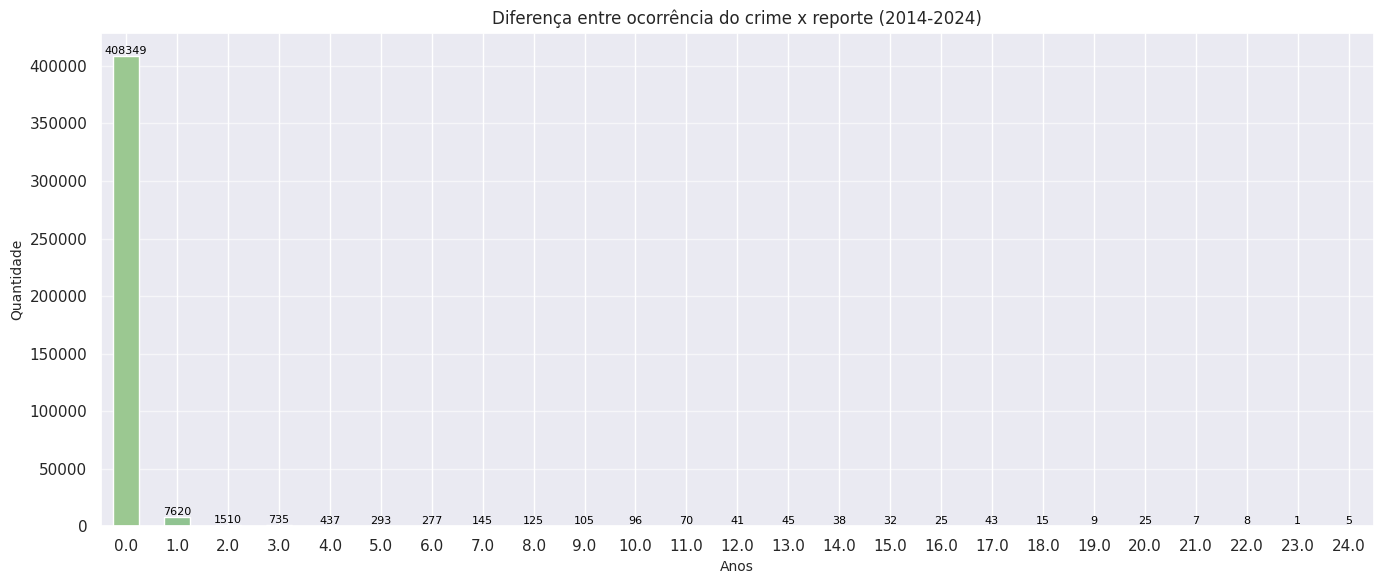

In [121]:
toronto_crimes['VAR_REPORT'] = (toronto_crimes['REPORT_YEAR']) - toronto_crimes['OCC_YEAR']
group_var_report = toronto_crimes.groupby('VAR_REPORT').size()

palette_color_delay = sns.color_palette("crest",len(group_var_report))

fig = plt.figure(figsize=(14,6))

ax = group_var_report.plot(kind='bar', stacked=True, color=palette_color_delay, zorder=2)
plt.title('Diferença de anos entre ocorrência do crime x reporte (2014-2024)', fontsize=12)
plt.xlabel('Anos', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)
plt.grid(axis='y', linestyle='-', alpha=0.6, zorder=1)
plt.xticks(rotation=0)

for container in ax.containers:
  bars_graph = [f'{int(bar.get_height())}' for bar in container]
  ax.bar_label(container, label=bars_graph, label_type='edge', fontsize=8, color='black')

plt.tight_layout()
plt.show()

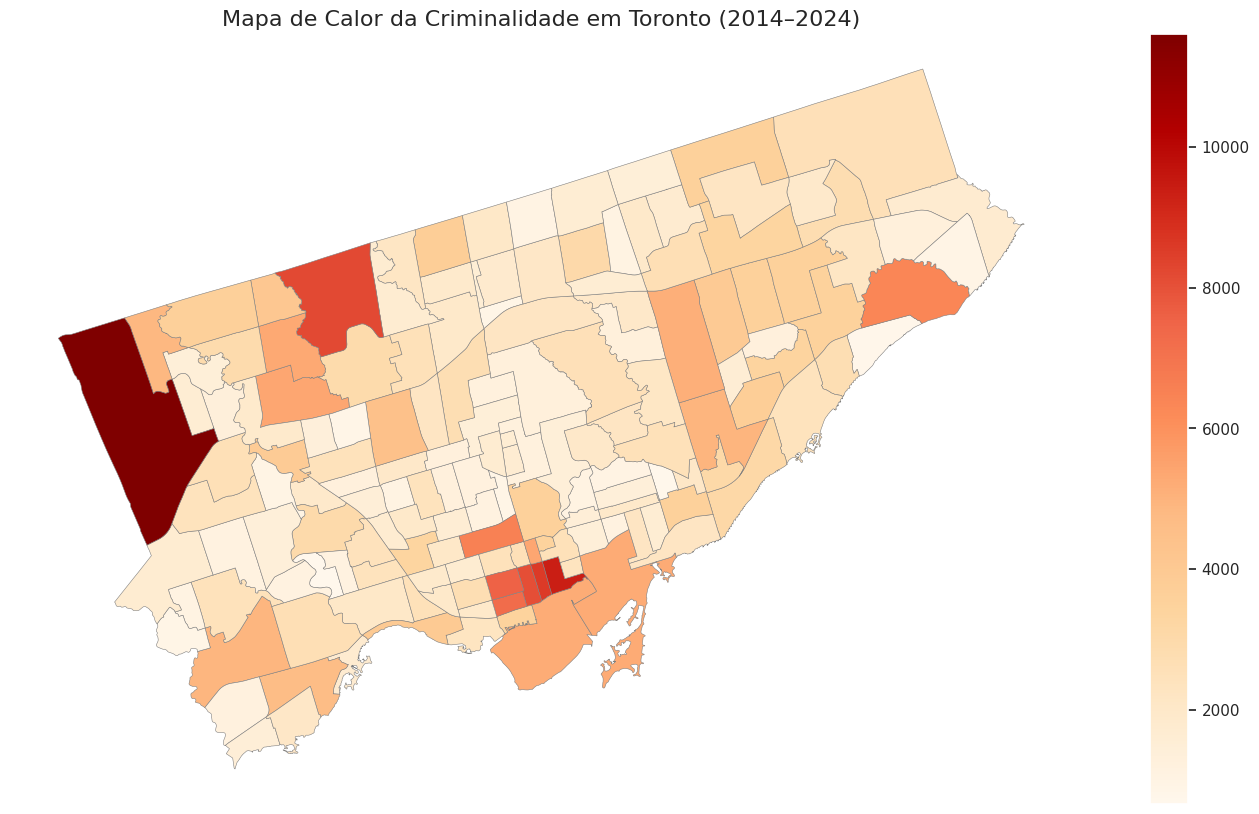

In [172]:
toronto_map = gpd.read_file(f'/content/Neighbourhoods - 4326.geojson')

group_neighbourhoods_crimes = toronto_crimes.groupby('NEIGHBOURHOOD_158').size().reset_index(name='TOTAL_CRIMES_158')
group_neighbourhoods_crimes = group_neighbourhoods_crimes.loc[group_neighbourhoods_crimes['NEIGHBOURHOOD_158']!='NSA']
group_neighbourhoods_crimes.loc[group_neighbourhoods_crimes['NEIGHBOURHOOD_158']=='St Lawrence-East Bayfront-The Islands ', 'NEIGHBOURHOOD_158'] = 'St Lawrence-East Bayfront-The Islands (166)'

toronto_map_crimes = toronto_map.merge(group_neighbourhoods_crimes, left_on='AREA_DESC', right_on='NEIGHBOURHOOD_158')

fig, ax = plt.subplots(figsize=(20,10))

toronto_map_crimes.plot(column='TOTAL_CRIMES_158', cmap='OrRd',legend=True, edgecolor='gray', linewidth=0.4, ax=ax)
ax.set_title('Mapa de Calor da Criminalidade em Toronto (2014–2024)', fontsize=16)
ax.set_axis_off()

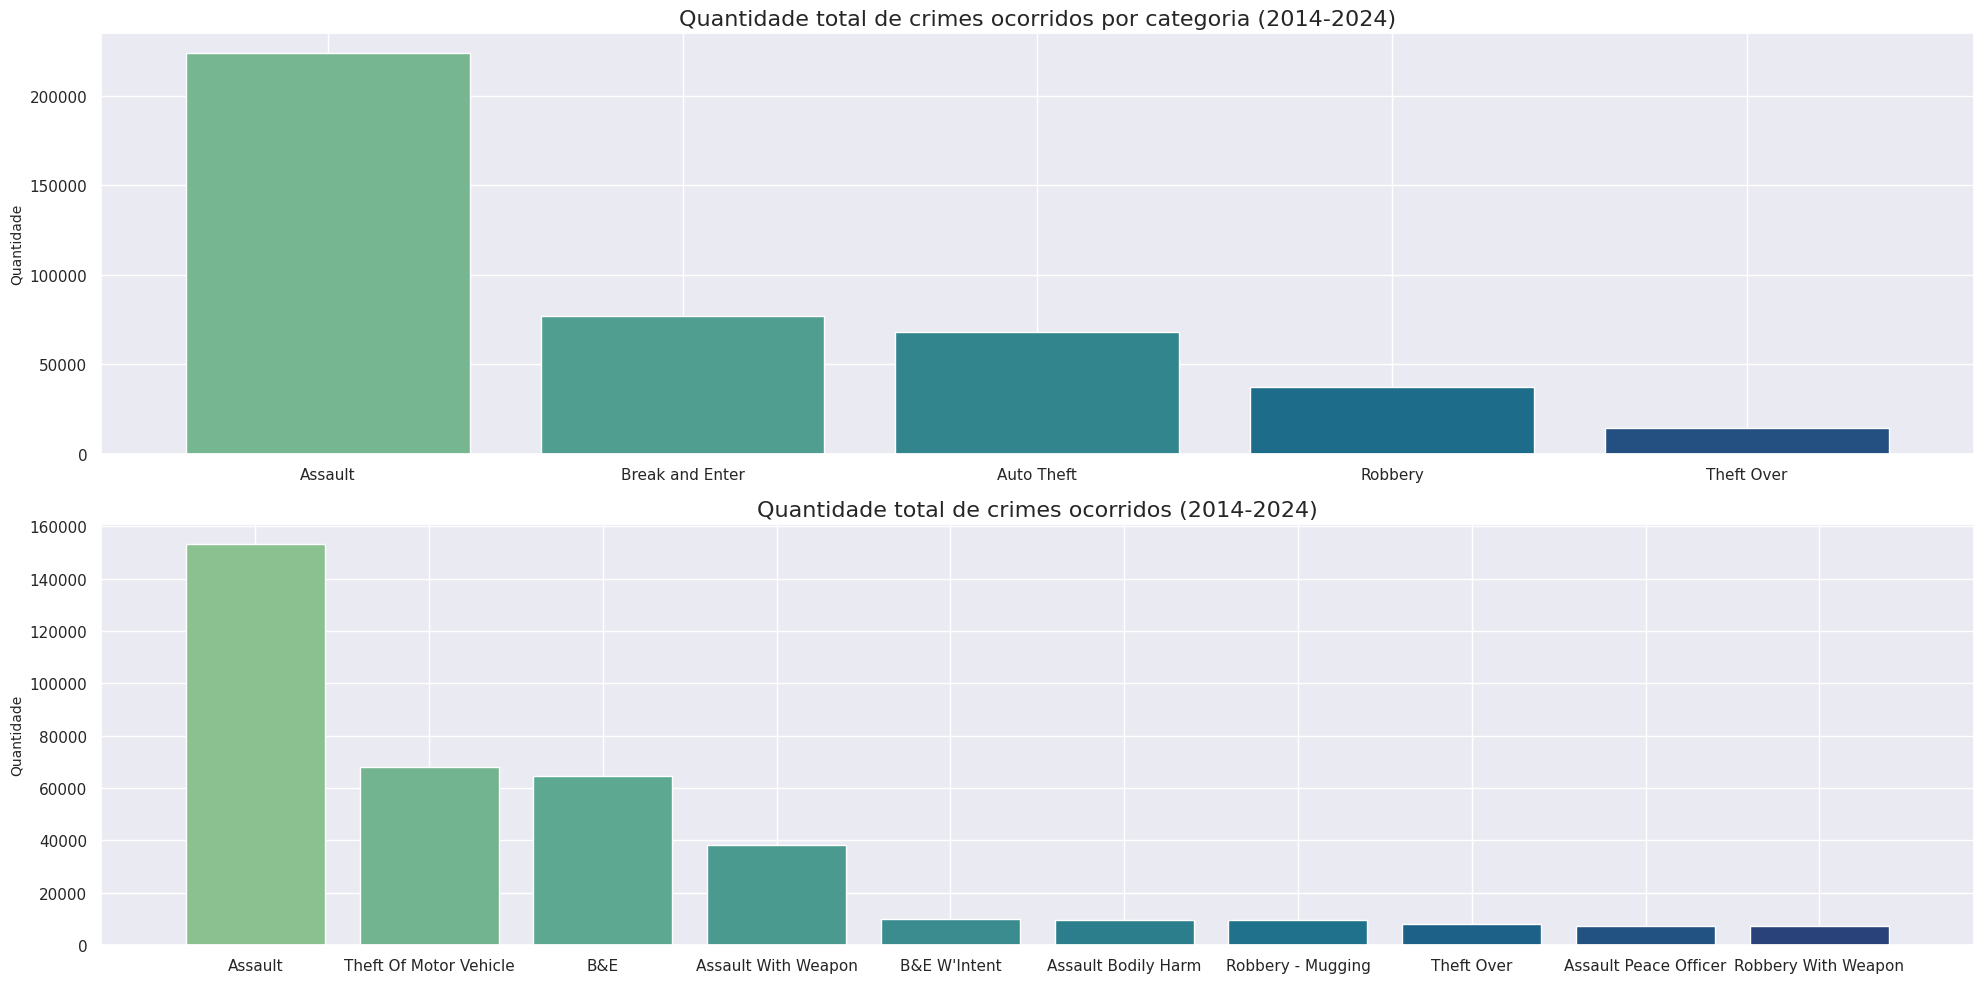

In [175]:
group_crimes_category = toronto_crimes.groupby('MCI_CATEGORY').size().reset_index(name='TOTAL_CRIMES').sort_values(by='TOTAL_CRIMES', ascending=False)
group_crimes_offence = toronto_crimes.groupby('OFFENCE').size().reset_index(name='TOTAL_CRIMES').sort_values(by='TOTAL_CRIMES', ascending=False)
group_crimes_offence_20 = group_crimes_offence[:10]

color_palette_category = sns.color_palette('crest',len(group_crimes_category))
color_palette_offence = sns.color_palette('crest',len(group_crimes_offence_20))

fig, ax = plt.subplots(nrows=2, figsize=(20,10))

ax[0].bar(group_crimes_category['MCI_CATEGORY'], group_crimes_category['TOTAL_CRIMES'], color=color_palette_category)
ax[0].set_title('Quantidade total de crimes ocorridos por categoria (2014-2024)', fontsize=16)
ax[0].set_xlabel('',fontsize=10)
ax[0].set_ylabel('Quantidade',fontsize=10)

ax[1].bar(group_crimes_offence_20['OFFENCE'], group_crimes_offence_20['TOTAL_CRIMES'], color=color_palette_offence)
ax[1].set_title('Quantidade total de crimes ocorridos (2014-2024)', fontsize=16)
ax[1].set_xlabel('',fontsize=10)
ax[1].set_ylabel('Quantidade',fontsize=10)

plt.tight_layout()
plt.show()

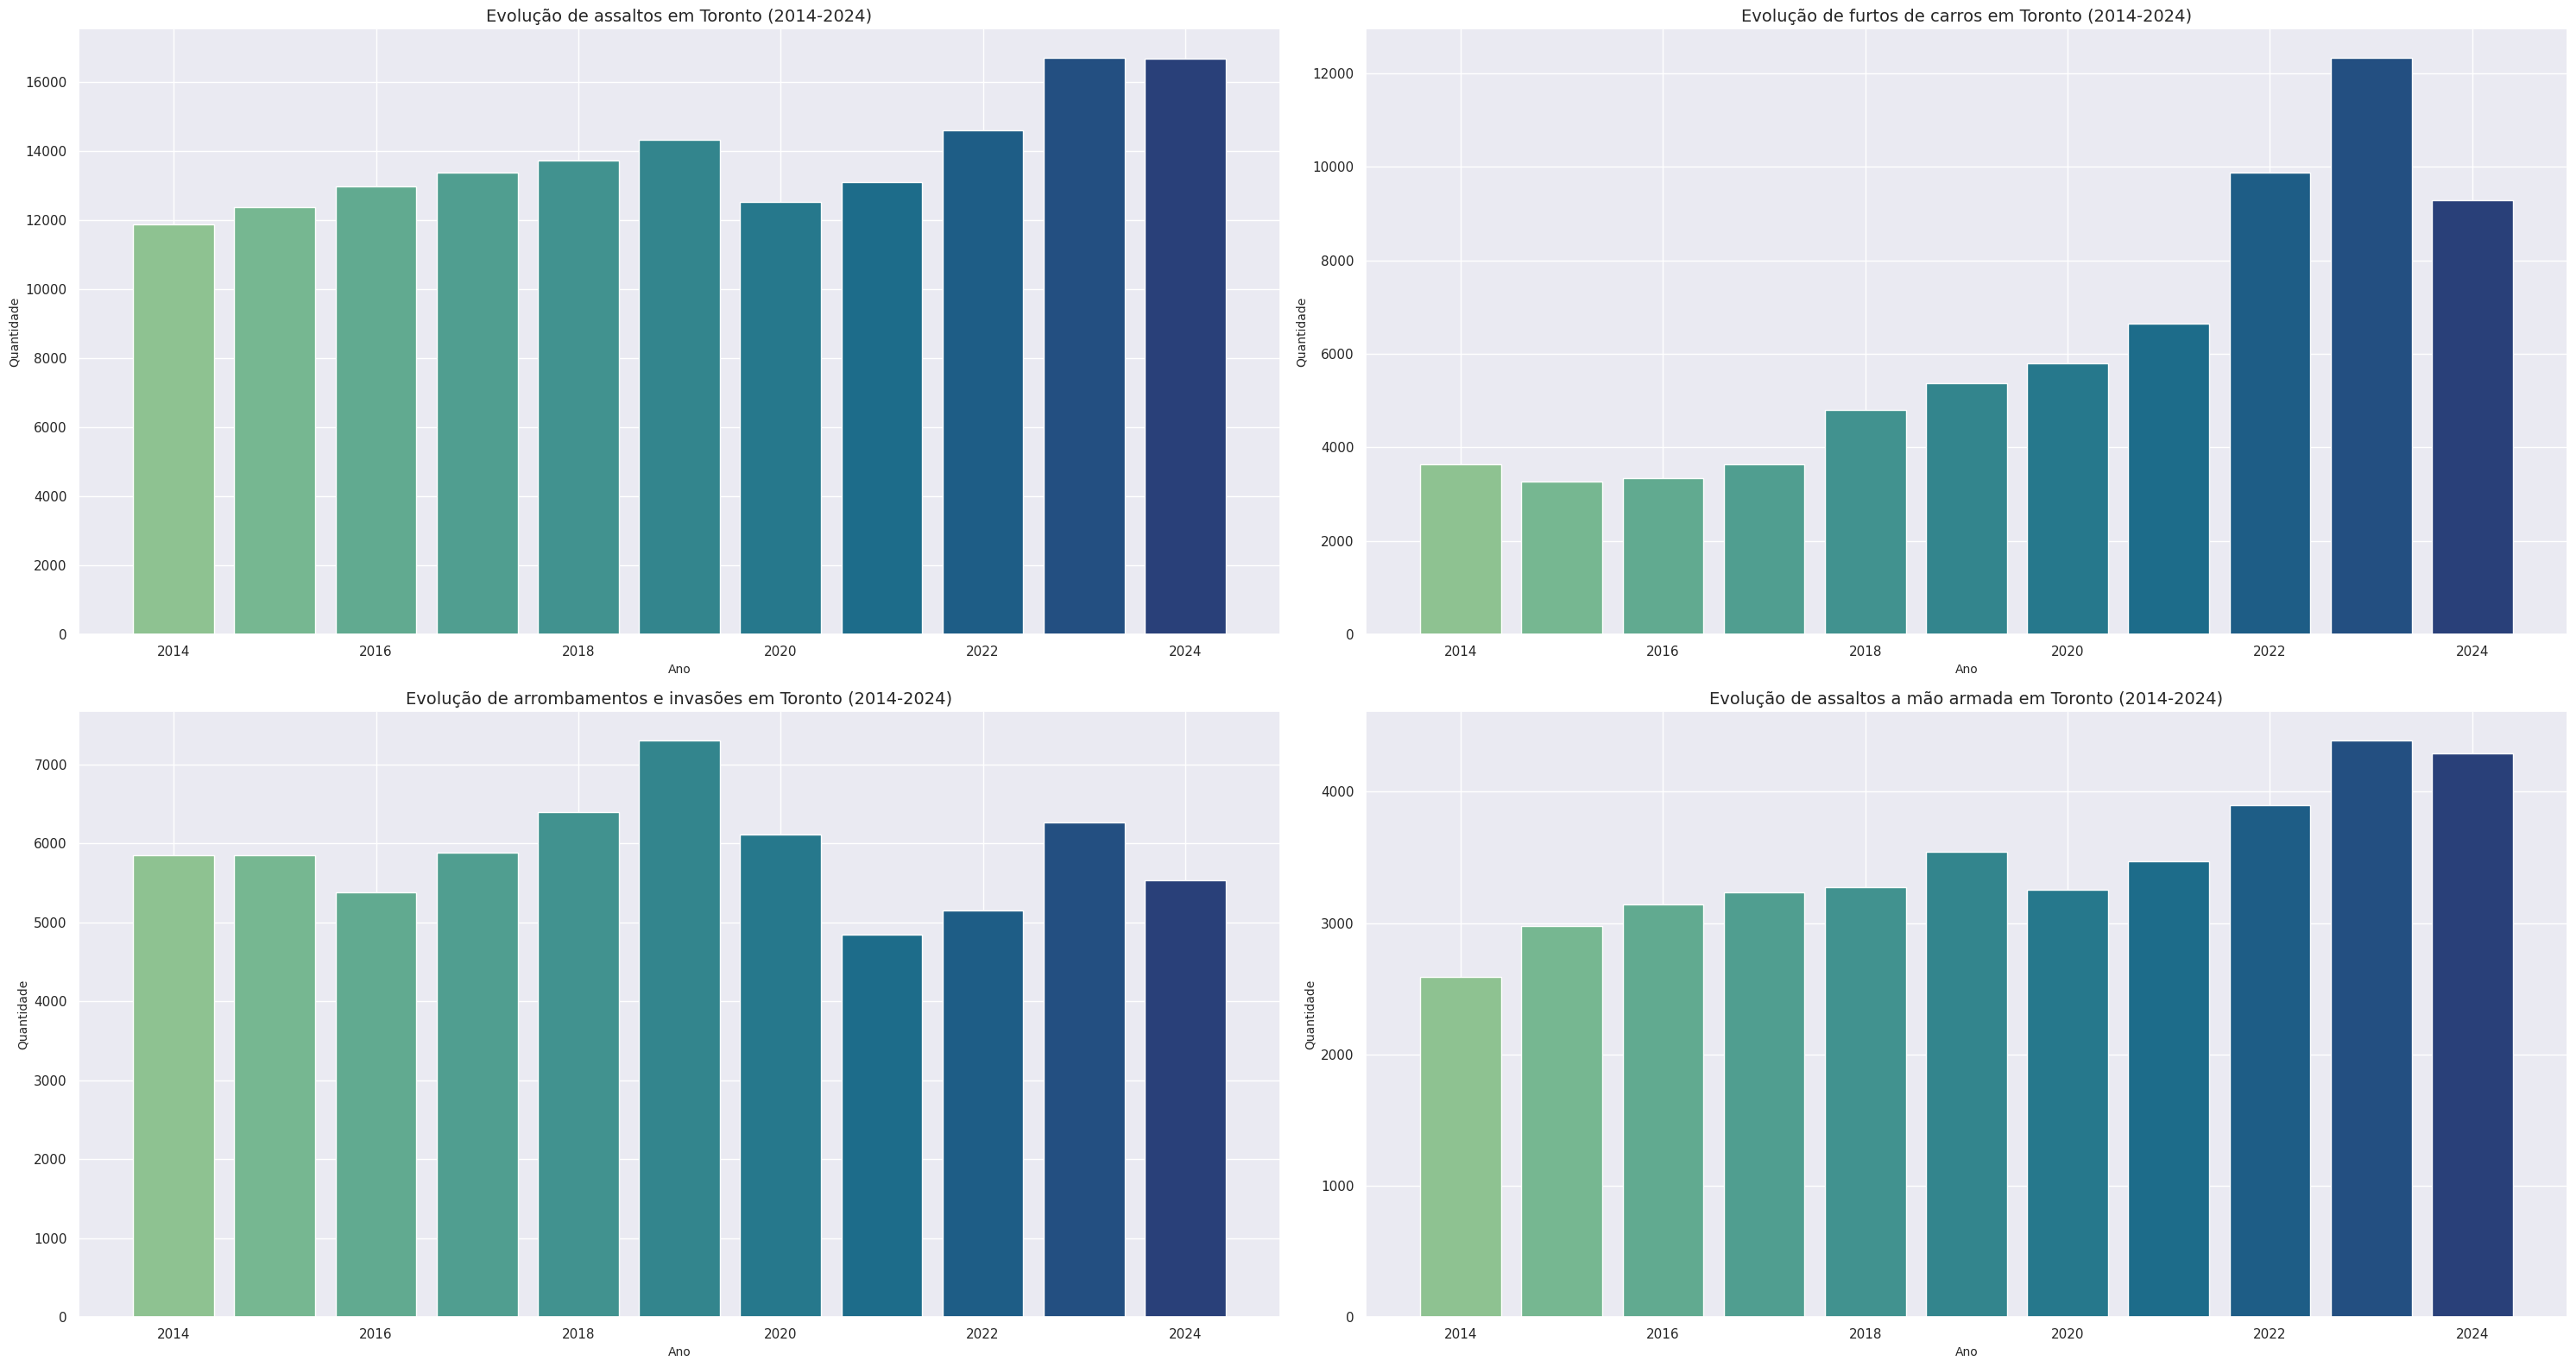

In [130]:
group_crime_assault = toronto_crimes.loc[toronto_crimes['OFFENCE']=='Assault']
group_crime_assault = group_crime_assault.groupby("OCC_YEAR").size().reset_index(name="TOTAL")
group_crime_assault = group_crime_assault.loc[group_crime_assault['OCC_YEAR']>=2014]

group_crime_theft = toronto_crimes.loc[toronto_crimes['OFFENCE']=='Theft Of Motor Vehicle']
group_crime_theft = group_crime_theft.groupby("OCC_YEAR").size().reset_index(name="TOTAL")
group_crime_theft = group_crime_theft.loc[group_crime_theft ['OCC_YEAR']>=2014]

group_crime_be = toronto_crimes.loc[toronto_crimes['OFFENCE']=='B&E']
group_crime_be = group_crime_be.groupby("OCC_YEAR").size().reset_index(name="TOTAL")
group_crime_be = group_crime_be.loc[group_crime_be['OCC_YEAR']>=2014]

group_crime_assault_weapon = toronto_crimes.loc[toronto_crimes['OFFENCE']=='Assault With Weapon']
group_crime_assault_weapon = group_crime_assault_weapon.groupby("OCC_YEAR").size().reset_index(name="TOTAL")
group_crime_assault_weapon = group_crime_assault_weapon.loc[group_crime_assault_weapon['OCC_YEAR']>=2014]

color_palette_ten_years = sns.color_palette('crest',11)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30,16))

ax[0][0].bar(group_crime_assault['OCC_YEAR'],group_crime_assault['TOTAL'],color=color_palette_ten_years)
ax[0][0].set_title('Evolução de assaltos em Toronto (2014-2024)', fontsize=14)
ax[0][0].set_xlabel('Ano',fontsize=10)
ax[0][0].set_ylabel('Quantidade',fontsize=10)

ax[0][1].bar(group_crime_theft['OCC_YEAR'],group_crime_theft['TOTAL'],color=color_palette_ten_years)
ax[0][1].set_title('Evolução de furtos de carros em Toronto (2014-2024)',fontsize=14)
ax[0][1].set_xlabel('Ano',fontsize=10)
ax[0][1].set_ylabel('Quantidade',fontsize=10)

ax[1][0].bar(group_crime_be['OCC_YEAR'],group_crime_be['TOTAL'],color=color_palette_ten_years)
ax[1][0].set_title('Evolução de arrombamentos e invasões em Toronto (2014-2024)',fontsize=14)
ax[1][0].set_xlabel('Ano',fontsize=10)
ax[1][0].set_ylabel('Quantidade',fontsize=10)

ax[1][1].bar(group_crime_assault_weapon['OCC_YEAR'],group_crime_assault_weapon['TOTAL'],color=color_palette_ten_years)
ax[1][1].set_title('Evolução de assaltos a mão armada em Toronto (2014-2024)',fontsize=14)
ax[1][1].set_xlabel('Ano',fontsize=10)
ax[1][1].set_ylabel('Quantidade',fontsize=10)


plt.tight_layout()
plt.show()

In [131]:
toronto_crimes.loc[toronto_crimes['NEIGHBOURHOOD_158']=='St Lawrence-East Bayfront-The Islands ', 'NEIGHBOURHOOD_158'] = 'St Lawrence-East Bayfront-The Islands (166)'

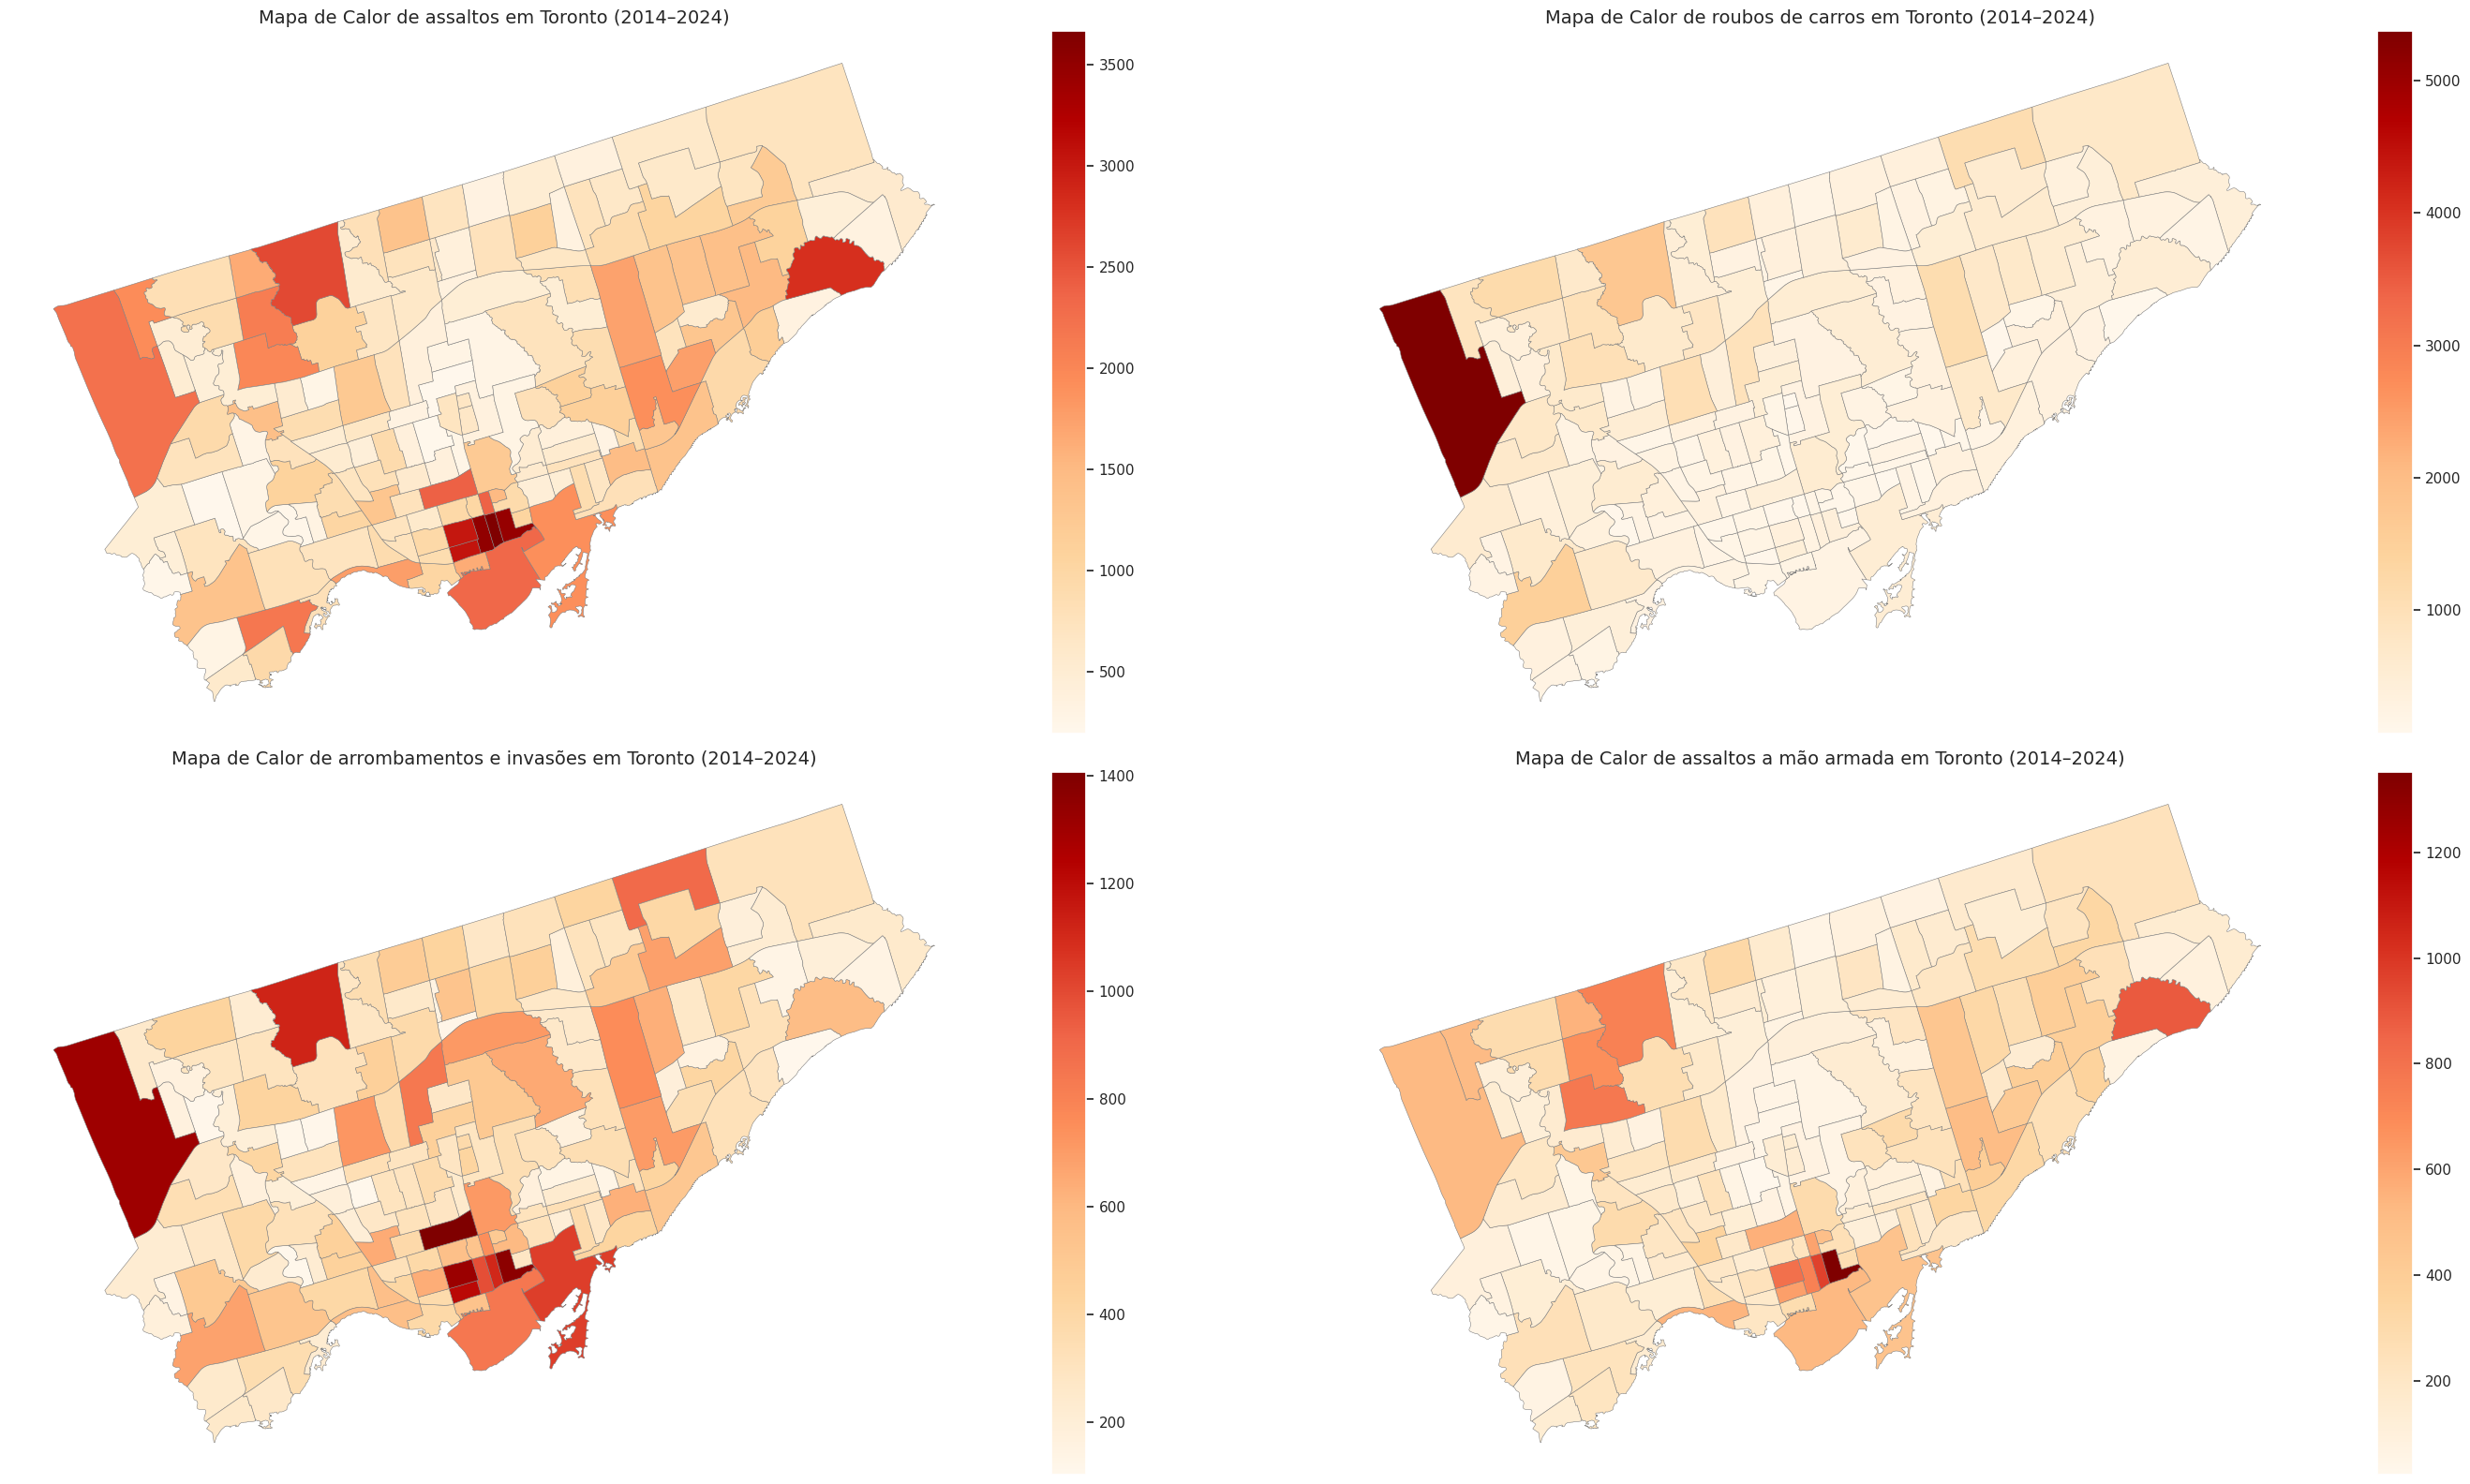

In [132]:
geo_group_crime_assault = toronto_crimes.loc[toronto_crimes['OFFENCE']=='Assault']
geo_group_crime_assault = geo_group_crime_assault.groupby('NEIGHBOURHOOD_158').size().reset_index(name='TOTAL_CRIMES_158')
geo_map_crime_assault = toronto_map.merge(geo_group_crime_assault, left_on='AREA_DESC', right_on='NEIGHBOURHOOD_158')

geo_group_crime_theft = toronto_crimes.loc[toronto_crimes['OFFENCE']=='Theft Of Motor Vehicle']
geo_group_crime_theft = geo_group_crime_theft.groupby('NEIGHBOURHOOD_158').size().reset_index(name='TOTAL_CRIMES_158')
geo_map_crime_theft = toronto_map.merge(geo_group_crime_theft, left_on='AREA_DESC', right_on='NEIGHBOURHOOD_158')

geo_group_crime_be = toronto_crimes.loc[toronto_crimes['OFFENCE']=='B&E']
geo_group_crime_be = geo_group_crime_be.groupby('NEIGHBOURHOOD_158').size().reset_index(name='TOTAL_CRIMES_158')
geo_map_crime_be = toronto_map.merge(geo_group_crime_be, left_on='AREA_DESC', right_on='NEIGHBOURHOOD_158')

geo_group_crime_assault_weapon = toronto_crimes.loc[toronto_crimes['OFFENCE']=='Assault With Weapon']
geo_group_crime_assault_weapon = geo_group_crime_assault_weapon.groupby('NEIGHBOURHOOD_158').size().reset_index(name='TOTAL_CRIMES_158')
geo_map_crime_assault_weapon = toronto_map.merge(geo_group_crime_assault_weapon, left_on='AREA_DESC', right_on='NEIGHBOURHOOD_158')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30,16))

geo_map_crime_assault.plot(column='TOTAL_CRIMES_158', cmap='OrRd',legend=True, edgecolor='gray', linewidth=0.4, ax=ax[0][0])
ax[0][0].set_title('Mapa de Calor de assaltos em Toronto (2014–2024)', fontsize=14)
ax[0][0].set_axis_off()

geo_map_crime_theft.plot(column='TOTAL_CRIMES_158', cmap='OrRd',legend=True, edgecolor='gray', linewidth=0.4, ax=ax[0][1])
ax[0][1].set_title('Mapa de Calor de roubos de carros em Toronto (2014–2024)',fontsize=14)
ax[0][1].set_axis_off()

geo_map_crime_be.plot(column='TOTAL_CRIMES_158', cmap='OrRd', legend=True, edgecolor='gray', linewidth=0.4, ax=ax[1][0])
ax[1][0].set_title('Mapa de Calor de arrombamentos e invasões em Toronto (2014–2024)',fontsize=14)
ax[1][0].set_axis_off()

geo_map_crime_assault_weapon.plot(column='TOTAL_CRIMES_158', cmap='OrRd',legend=True, edgecolor='gray', linewidth=0.4, ax=ax[1][1])
ax[1][1].set_title('Mapa de Calor de assaltos a mão armada em Toronto (2014–2024)',fontsize=14)
ax[1][1].set_axis_off()

plt.tight_layout()
plt.show()


In [187]:
geo_group_crime_assault = geo_group_crime_assault.sort_values(by='TOTAL_CRIMES_158',ascending=False)
geo_group_crime_assault.head()

,NEIGHBOURHOOD_158,TOTAL_CRIMES_158
36,Downtown Yonge East (168),3667
153,Yonge-Bay Corridor (170),3509
93,Moss Park (73),3474
138,Wellington Place (164),3055
74,Kensington-Chinatown (78),3022


In [185]:
geo_group_crime_theft = geo_group_crime_theft.sort_values(by='TOTAL_CRIMES_158',ascending=False)
geo_group_crime_theft.head()

,NEIGHBOURHOOD_158,TOTAL_CRIMES_158
140,West Humber-Clairville (1),5372
157,York University Heights (27),1735
46,Etobicoke City Centre (159),1518
65,Humber Summit (21),1174
146,Wexford/Maryvale (119),1113


In [184]:
geo_group_crime_be = geo_group_crime_be.sort_values(by='TOTAL_CRIMES_158',ascending=False)
geo_group_crime_be.head()

,NEIGHBOURHOOD_158,TOTAL_CRIMES_158
3,Annex (95),1407
93,Moss Park (73),1366
74,Kensington-Chinatown (78),1316
140,West Humber-Clairville (1),1308
138,Wellington Place (164),1213


In [183]:
geo_group_crime_assault_weapon = geo_group_crime_assault_weapon.sort_values(by='TOTAL_CRIMES_158',ascending=False)
geo_group_crime_assault_weapon.head()

,NEIGHBOURHOOD_158,TOTAL_CRIMES_158
93,Moss Park (73),1352
36,Downtown Yonge East (168),967
139,West Hill (136),887
74,Kensington-Chinatown (78),810
105,Oakdale-Beverley Heights (154),775


Podemos ver que, em geral, entendemos qual aparenta ser o bairro mais perigoso de Toronto, além de questionar se para algumas modalidades de crimes o efeito do deslocamento geografico da criminalidade está ocorrendo.

Por exemplo, para o caso de assaltos em Moss Park. Podemos ver como bairros proximos possuem números parecidos para assaltos. Também é possível afirmar para a modalidade de assaltos a mão armada, que ocorrem com frequência em bairros vizinhos.

Outro fator importante que podemos inferir aqui, é a tendência de crescimento dos principais quatro crimes que ocorrem com maior frequencia. O mais preocupante se apresenta como o roubo de carros, do qual, em 11 anos mostra um aumento de 200% em relação ao periodo inicial dos dados, com foco principal no bairro de West Humber-Clairville.

#Resultados

Com base nas análises realizadas ao longo do trabalho — utilizando gráficos temporais, mapas geoespaciais e métricas de frequência — é possível responder de forma objetiva às perguntas que nortearam este estudo. A seguir, são apresentadas as principais conclusões obtidas, organizadas conforme as questões propostas na introdução, permitindo uma visão clara e direta dos padrões de criminalidade em Toronto entre os anos de 2014 e 2024.
Portanto, respondendo as questões realizadas ao inicio do estudo:

1. Quais são os períodos do ano e os horários mais críticos em termos de criminalidade?

- **R:** Em termos de quantidade total de ocorrências, o horário mais perigoso é meia noite, porém, quando levamos em consideração a média de ocorrências por horário, a partir das 18h há um pico. Já quando falamos de meses, a distribuição é balanceada, mas com destaque para o inverno(principalmente fevereiro), apresentando-se como o meses mais "seguros".


2. Quais bairros ou regiões concentram os maiores índices de ocorrências?
- **R:** O bairro de West Humber-Clairville aparenta se mostrar como bairro mais perigoso de Toronto. O principal crime ocorrido no bairro é o de roubos de carros.


3. Quais tipos de crimes são mais frequentes e como eles se distribuem ao longo do tempo e do espaço?
- **R:** Os principais tipos de crimes são assaltos, assaltos a mão armada, arrombamento e invasão e roubo de carros. Apesar da modalidade de arrombamento e invação não apresentar uma tendencia constante de crescimento, para os outros três crimes o movimento de evolução é constante e acentuado principalmente quando falamos de roubo de carros.


4. Existem padrões recorrentes ou tendências preocupantes que possam subsidiar a tomada de decisão por parte das autoridades?
- **R:** Furtos de carros apresentam uma tendencia de evolução, porém após pico em 2023, onde seu crescimento em relação a 2014 é de aproximadamente 200%. Uma queda foi apresentada em 2024. O mesmo pode ser dito para assaltos e assaltos a mão armada. Com o passar dos anos uma taxa de crescimento foi apresentada, até que em 2020 (devido a pandemia de COVID-19) devido ao menor fluxo de pessoas circulando uma queda foi apresentada, mas a tendencia de crescimento segue. As autoridades devem se preocupar em regiões como West Hamber-Clairville, Moss Park e região, para evitar que possa haver um efeito balão da criminalidade nas dependências.